# Part I - Prosper Loan Dataset Exploration
## by Fangyuan Xu

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
pip install seaborn



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [165]:
loan_data = pd.read_csv('prosperLoanData.csv')


In [166]:
loan_data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [167]:
loan_data['CreditGrade'].unique()

array(['C', nan, 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC'], dtype=object)

### What is the structure of your dataset?

> Most of the data is numeric, and there is some data type is datetime. Some variables such as CreditGrade, LoanStatus are ordered factor variables with the following levels
 CreditGrade: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.
 LoanStatus: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue

### What is/are the main feature(s) of interest in your dataset?
>  I would like to find out what factors contribute to the the level of loans. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I am looking forward that Credit grade and Emoloyment status will determine the loan status, as well as whether types of occupation would affect the amounts of loan.

## Univariate Exploration


### What are the distrubution of Credit Grade?

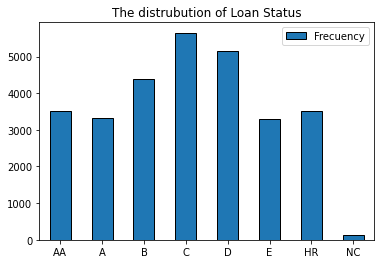

In [168]:
loan_data['CreditGrade_new']=loan_data['CreditGrade']
ordinal_var_dict1 = {'CreditGrade_new': ['AA', 'A', 'B',
'C', 'D', 'E', 'HR','NC']}
for var in ordinal_var_dict1:
    ordered_var1 = pd.api.types.CategoricalDtype(ordered = True,
    categories = ordinal_var_dict1[var])
    loan_data[var] = loan_data[var].astype(ordered_var1)
loan_data['CreditGrade_new'].value_counts().sort_index().plot.bar(edgecolor='black')
plt.title('The distrubution of Loan Status')
plt.legend(['Frecuency'])
plt.xticks(rotation=0);


### Observation
>Most of the borrowers have C as their credit grade, and the better credit grade like A and AA are less than the amount of C and D.

### What are the distrubution of Loan Original Amount?

In [13]:
LOA = loan_data.LoanOriginalAmount.value_counts().to_frame()

In [15]:
LOA.reset_index(inplace=True)

In [16]:
LOA.rename(columns = {'index':'Amount'}, inplace=True)

In [17]:
LOA

,Amount,LoanOriginalAmount
0,4000,14333
1,15000,12407
2,10000,11106
3,5000,6990
4,2000,6067
...,...,...
2463,5284,1
2464,7936,1
2465,1201,1
2466,10593,1


In [18]:
LOA = LOA.sort_values(by= ['Amount'], ascending=False)

In [19]:
LOA

,Amount,LoanOriginalAmount
29,35000,430
352,34999,3
896,34700,1
2391,34679,1
268,34000,5
...,...,...
123,1025,33
1904,1010,1
528,1005,2
221,1001,8


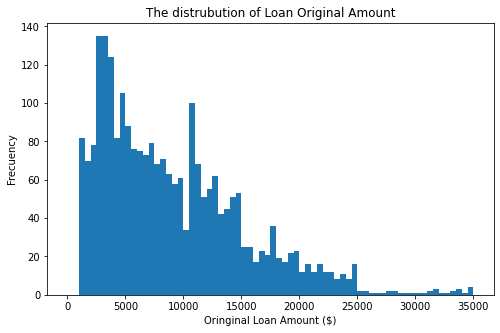

In [167]:
#code from Example_Project_Diamons_Part1
binsize = 500
bins = np.arange(0, LOA['Amount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = LOA, x = 'Amount', bins = bins)
plt.xlabel('Oringinal Loan Amount ($)')
plt.ylabel('Frecuency')
plt.title('The distrubution of Loan Original Amount')
plt.show()


### Observation
>Most of the borrowers tend to have 3000-5000 dollars loan. and the borrowers amounts are decreasing while the original loan amounts are increasing.

### What are the top 10 of popular occupation of the borrowers in this dataset ?

In [69]:
Occupation = loan_data.Occupation.value_counts().to_frame()

In [70]:
Occupation

,Occupation
Other,28617
Professional,13628
Computer Programmer,4478
Executive,4311
Teacher,3759
...,...
Dentist,68
Student - College Freshman,41
Student - Community College,28
Judge,22


In [71]:
Occupation.reset_index(inplace=True)

In [72]:
Occupation.rename(columns = {'index':'Occupation', 'Occupation': 'Frecuency'}, inplace=True)

In [73]:
occupation1 = Occupation.head(10)

In [74]:
occupation1

,Occupation,Frecuency
0,Other,28617
1,Professional,13628
2,Computer Programmer,4478
3,Executive,4311
4,Teacher,3759
5,Administrative Assistant,3688
6,Analyst,3602
7,Sales - Commission,3446
8,Accountant/CPA,3233
9,Clerical,3164


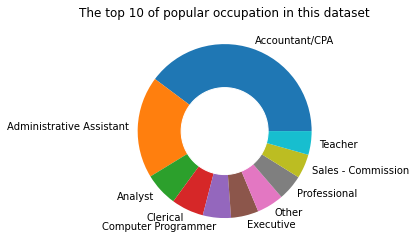

In [75]:
category_values = occupation1.Frecuency

category_names = occupation1['Occupation']
categories = category_names.unique()
categories.sort()
plt.pie(category_values, labels=categories)
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('The top 10 of popular occupation in this dataset')
plt.show()

#Code is reference from:

### Observation
>The most common occupation of the borrowers are accountant, administrative assistnat, other occupation have similar number of borrowers.

### Waht are the distrubution of Employment Status of the  borrowers?

In [28]:
Employment_Status = loan_data.EmploymentStatus.value_counts().to_frame()

In [29]:
Employment_Status

,EmploymentStatus
Employed,67322
Full-time,26355
Self-employed,6134
Not available,5347
Other,3806
Part-time,1088
Not employed,835
Retired,795


In [30]:
Employment_Status.reset_index(inplace=True)

In [31]:
Employment_Status.rename(columns = {'index':'Type_of_Status', 'EmploymentStatus' : 'Frecuency'}, inplace=True)

In [32]:
Employment_Status = Employment_Status.sort_values(by= ['Frecuency'], ascending=False)

In [33]:
Employment_Status

,Type_of_Status,Frecuency
0,Employed,67322
1,Full-time,26355
2,Self-employed,6134
3,Not available,5347
4,Other,3806
5,Part-time,1088
6,Not employed,835
7,Retired,795


Text(0.5, 1.0, 'The distrubution of Employment Status')

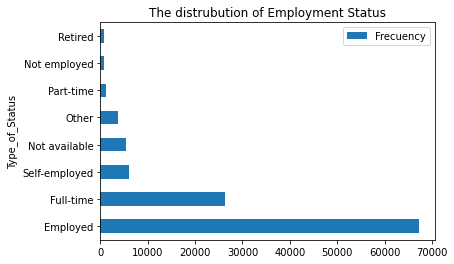

In [169]:
Employment_Status.plot.barh(x='Type_of_Status', y='Frecuency')
plt.title('The distrubution of Employment Status')

### Obseravtion
> Most of the borrowers are employed or have a full-time job. Only little part of the borrowers are retired or not emplyed.

### What are the borrowers' distrubution of Loan Status.

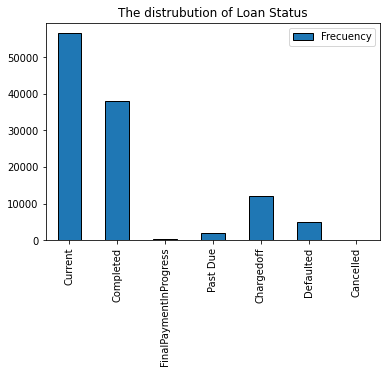

In [168]:
loan_data['LoanStatus_new']=loan_data['LoanStatus']
mask= loan_data['LoanStatus_new'].str.contains ("Past Due")
loan_data.loc[mask,'LoanStatus_new']="Past Due"
ordinal_var_dict = {'LoanStatus_new': ['Current', 'Completed', 'FinalPaymentInProgress',
'Past Due', 'Chargedoff', 'Defaulted', 'Cancelled']}
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
    categories = ordinal_var_dict[var])
    loan_data[var] = loan_data[var].astype(ordered_var)
loan_data['LoanStatus_new'].value_counts().sort_index().plot.bar(edgecolor='black')
plt.title('The distrubution of Loan Status')
plt.legend(['Frecuency'])

### Obseravtaion
>The loan status of borrowers are mostly "Current" or "Complete", and there are small portion borrowers are past their loan due or got the loan cancelled.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Most of the people have their original loan amount less than 15,000 dollars, and most of the people have are employed.There are lots of types of occupation in the dataset, so I decide to visualize the 10 most common occupation of this dataset. And only small amount of people pass their due time of loan payment.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I need to change the index name of the dataframe inorder to plot the graph for visualization. By sorting the data in accseding order, I am able to visualize the data in order which is easier to read.

## Bivariate Exploration



### What is the relationship between Loan Original Amount and Stated Monthly Income?

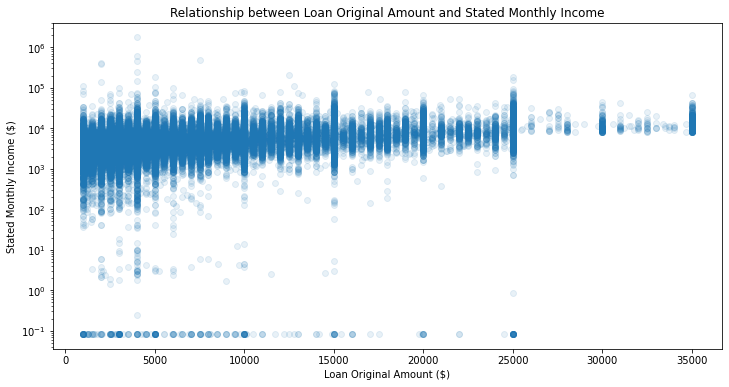

In [179]:
plt.figure(figsize = [12, 6])
plt.scatter(data = loan_data, x = 'LoanOriginalAmount', y = 'StatedMonthlyIncome', alpha = 1/10)
plt.ylabel('Stated Monthly Income ($)')
plt.yscale('log')
plt.xlabel('Loan Original Amount ($)')
plt.title('Relationship between Loan Original Amount and Stated Monthly Income')
plt.show()

### Observation
>Most of the people who have monthly income between 100 - 10000 dollars have loan original amount of 0-5000 dollars, the higher the loan original amount the less amount of people taking a loan.

### What is the relationship between Employment Status and Loan Original Amount?

/var/folders/fp/8kb3pldj2qgddmfbw_s483fw0000gn/T/ipykernel_81935/2984993289.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sb.pointplot(data=loan_data, x='EmploymentStatus', y='LoanOriginalAmount', color=base_color, ci='sd', linestyles="")


Text(0.5, 1.0, 'Relationship between Employment Status and Loan Original Amount')

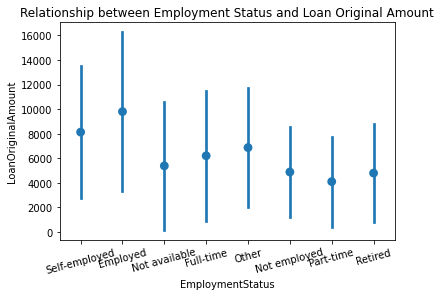

In [43]:
base_color = sb.color_palette()[0]
sb.pointplot(data=loan_data, x='EmploymentStatus', y='LoanOriginalAmount', color=base_color, ci='sd', linestyles="")
plt.xticks(rotation=15);
plt.ylabel('LoanOriginalAmount')
plt.title('Relationship between Employment Status and Loan Original Amount')

### Observation
> People who are employed generally have more Loan original amount than people in other employment status, and people who are working part time have the least Loan original amount. 

### What is the relationship between Credit Grade and Loan Original Amount?

Text(0.5, 1.0, 'Relationship between Credit Grade and Loan Original Amount')

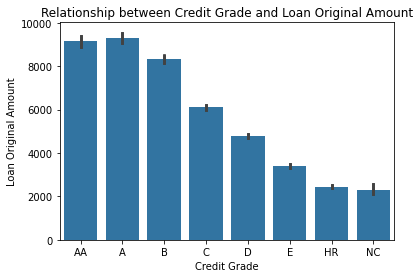

In [13]:
base_color = sb.color_palette()[0]
sb.barplot(data=loan_data.sort_values(by= ['CreditGrade']), x='CreditGrade_new', y='LoanOriginalAmount', color=base_color)
plt.xticks(rotation=0);
sb.barplot(data=loan_data.sort_values(by= ['CreditGrade']), x='CreditGrade_new', y='LoanOriginalAmount', color=base_color, errwidth=0)
sb.barplot(data=loan_data.sort_values(by= ['CreditGrade']), x='CreditGrade_new', y='LoanOriginalAmount', color=base_color)
plt.xlabel('Credit Grade')
plt.ylabel('Loan Original Amount')
plt.title('Relationship between Credit Grade and Loan Original Amount')


### Observation
>Borrowers with higher credit scores borrow more money than the one who have lower credit score. 

### What is the relationship between Top 10 common occupation of borrowers and their Loan Original Amount?


In [45]:
occupation_list = list(occupation1.Occupation)

In [46]:
o_loan = loan_data.groupby('Occupation')

In [47]:
o_loan1 = o_loan.sum()

In [48]:
o_loan1.reset_index(inplace=True)
o_loan1.rename(columns = {'index':'Occupation'}, inplace=True)

In [49]:
o_loan2 = o_loan1.sort_values(by = ['LoanOriginalAmount'], ascending=False).head(11)

In [50]:
o_loan2

,Occupation,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
35,Other,17630881105,1169028,6447.07685,5688.5284,5398.5852,3757.89085,1810.2002,2112.82165,83166.0,...,-1539048.01,-385893.7423,22434398.55,21937427.93,643621.50,28573.9906,1420,708,510006.94,2237441
41,Professional,8713326903,562344,2927.05432,2573.3021,2436.0974,1720.83871,806.5694,1002.65481,44438.0,...,-840891.21,-201705.2198,8784102.10,8499730.96,358619.47,13610.0402,689,324,231286.88,1224415
19,Executive,2926802476,179196,871.89543,761.1874,718.5087,529.54316,235.9057,314.06046,15724.0,...,-326185.01,-69003.8717,3410010.35,3320205.77,115851.37,4301.1837,167,82,90824.75,466762
12,Computer Programmer,2637976668,177552,859.60696,752.3002,708.5553,473.42872,214.4128,289.14042,14915.0,...,-292282.18,-70889.7114,2204714.13,2090589.80,100015.36,4471.9441,297,143,53391.24,479111
2,Analyst,2294057705,147744,725.37132,635.2406,599.4295,421.37435,192.1084,250.45445,12154.0,...,-215609.84,-43339.1452,1650499.53,1610149.81,50702.75,3597.2349,191,85,38403.06,325930
47,Sales - Commission,2050488868,139872,753.16744,667.4859,632.1134,396.32687,187.1186,225.93027,9589.0,...,-194085.37,-65769.2793,3745582.80,3684278.24,141193.82,3440.1774,208,95,40062.17,308386
0,Accountant/CPA,2121077853,133020,677.68944,592.9964,560.7052,412.77278,191.5037,241.46458,11037.0,...,-190838.48,-46003.2687,1784891.49,1727946.58,62981.28,3229.8137,143,79,81972.42,272503
59,Teacher,2438766112,154500,828.44029,728.5775,690.7463,486.62271,233.0891,276.74911,11736.0,...,-206990.16,-88669.3154,2293251.33,2176382.16,152605.30,3754.8964,132,61,48002.62,281689
33,Nurse (RN),1837699291,104124,526.29561,456.6618,431.6743,348.28394,159.2081,198.77234,9281.0,...,-152977.29,-35644.9519,1118666.76,1077282.52,62436.81,2485.4367,72,46,20978.90,196878
1,Administrative Assistant,2183146307,148560,887.71019,786.0025,748.4700,502.91875,249.5099,281.39535,9837.0,...,-188751.84,-62687.0223,2563128.58,2486576.99,97605.78,3681.4953,218,90,68256.46,251702


In [51]:
o_loan2 =o_loan2.drop([35])

In [52]:
o_loan2

,Occupation,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
41,Professional,8713326903,562344,2927.05432,2573.3021,2436.0974,1720.83871,806.5694,1002.65481,44438.0,...,-840891.21,-201705.2198,8784102.10,8499730.96,358619.47,13610.0402,689,324,231286.88,1224415
19,Executive,2926802476,179196,871.89543,761.1874,718.5087,529.54316,235.9057,314.06046,15724.0,...,-326185.01,-69003.8717,3410010.35,3320205.77,115851.37,4301.1837,167,82,90824.75,466762
12,Computer Programmer,2637976668,177552,859.60696,752.3002,708.5553,473.42872,214.4128,289.14042,14915.0,...,-292282.18,-70889.7114,2204714.13,2090589.80,100015.36,4471.9441,297,143,53391.24,479111
2,Analyst,2294057705,147744,725.37132,635.2406,599.4295,421.37435,192.1084,250.45445,12154.0,...,-215609.84,-43339.1452,1650499.53,1610149.81,50702.75,3597.2349,191,85,38403.06,325930
47,Sales - Commission,2050488868,139872,753.16744,667.4859,632.1134,396.32687,187.1186,225.93027,9589.0,...,-194085.37,-65769.2793,3745582.80,3684278.24,141193.82,3440.1774,208,95,40062.17,308386
0,Accountant/CPA,2121077853,133020,677.68944,592.9964,560.7052,412.77278,191.5037,241.46458,11037.0,...,-190838.48,-46003.2687,1784891.49,1727946.58,62981.28,3229.8137,143,79,81972.42,272503
59,Teacher,2438766112,154500,828.44029,728.5775,690.7463,486.62271,233.0891,276.74911,11736.0,...,-206990.16,-88669.3154,2293251.33,2176382.16,152605.30,3754.8964,132,61,48002.62,281689
33,Nurse (RN),1837699291,104124,526.29561,456.6618,431.6743,348.28394,159.2081,198.77234,9281.0,...,-152977.29,-35644.9519,1118666.76,1077282.52,62436.81,2485.4367,72,46,20978.90,196878
1,Administrative Assistant,2183146307,148560,887.71019,786.0025,748.4700,502.91875,249.5099,281.39535,9837.0,...,-188751.84,-62687.0223,2563128.58,2486576.99,97605.78,3681.4953,218,90,68256.46,251702
46,Retail Management,1712744394,108120,587.34874,517.1596,490.9947,348.11061,165.1258,196.27081,7965.0,...,-137281.82,-31141.5753,2067707.82,2020930.89,71491.77,2597.9358,109,61,51838.11,194977


Text(0, 0.5, 'Loan Original Amount')

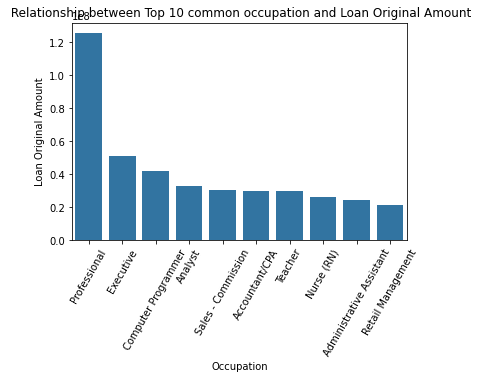

In [53]:
base_color = sb.color_palette()[0]
sb.barplot(data=o_loan2, x='Occupation', y='LoanOriginalAmount', color=base_color)
plt.title(' Relationship between Top 10 common occupation and Loan Original Amount')
plt.xticks(rotation=60);
sb.barplot(data=o_loan2, x='Occupation', y='LoanOriginalAmount', color=base_color, errwidth=0)
sb.barplot(data=o_loan2, x='Occupation', y='LoanOriginalAmount', color=base_color)
plt.xlabel('Occupation')
plt.ylabel('Loan Original Amount')


### Observation
>Professional borroers the most amount of the loan. Executive and Computer Programmer Analyst also borrow more loan than other occupation. The rest of occupation have similar loan original amount.

### What is the relationship between Loan Status and Loan Original Amount?


Text(0.5, 1.0, 'Relationship between Loan Status and Loan Original Amount')

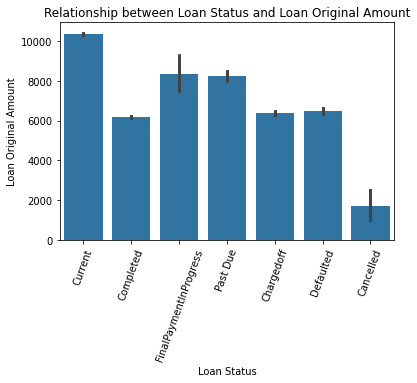

In [172]:
base_color = sb.color_palette()[0]
sb.barplot(data=loan_data.sort_values(by = ['LoanOriginalAmount']), x='LoanStatus_new', y='LoanOriginalAmount', color=base_color)
plt.xticks(rotation=70);
sb.barplot(data=loan_data.sort_values(by = ['LoanOriginalAmount']), x='LoanStatus_new', y='LoanOriginalAmount', color=base_color, errwidth=0)
sb.barplot(data=loan_data.sort_values(by = ['LoanOriginalAmount']), x='LoanStatus_new', y='LoanOriginalAmount', color=base_color)
plt.xlabel('Loan Status')
plt.ylabel('Loan Original Amount')
plt.title('Relationship between Loan Status and Loan Original Amount')

### Observation
>The Current loan status associates with more loan original amount, the smallest original amount corresponds to Cancelled status. The original loan amount are about the same regard to Past Due and Final Payment Process status, similar as Charge Off and Defaulted status.

### What is the correlation between Loan Original Amount, Borrower Rate and Prosper Rating?

In [55]:
dfcorr= loan_data[['LoanOriginalAmount','BorrowerRate','ProsperRating (numeric)']]

[Text(0.5, 1.0, 'Correlation between Loan Original Amount, Borrower Rate and Prosper Rating')]

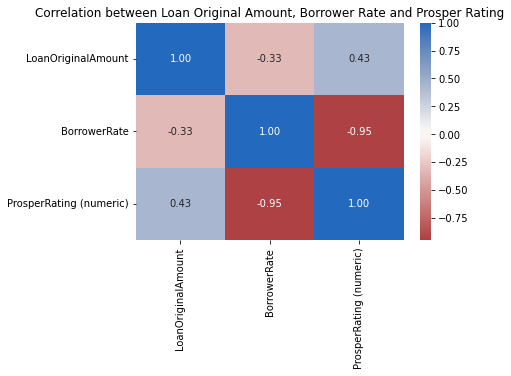

In [56]:
sb.heatmap(dfcorr.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0).set(title= 'Correlation between Loan Original Amount, Borrower Rate and Prosper Rating')


### Observation
>Borrower rate and prosper rate have a strong correlation, which is -0.95 and almost close to 1. And prosper rate has stronger correlation with loan original amount than borrower rate.

### What is the relationship between Loan Original Amount and Lender Yield refarding of credit grade AA, C and D?

In [57]:
CG2 = loan_data.loc[loan_data['CreditGrade'].isin(['AA', 'C', 'D'])]


[Text(0.5, 1.0, 'Relationship bwtween Loan Original Amount and Lender Yield refarding of credit grade AA, C and D')]

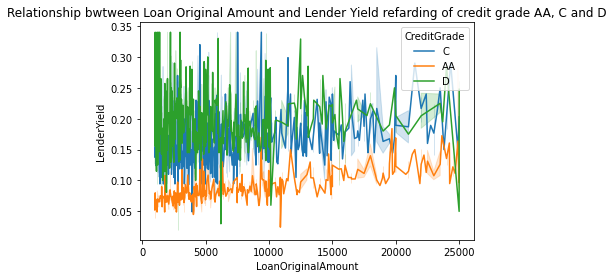

In [58]:
sb.lineplot(data=CG2, x="LoanOriginalAmount", y="LenderYield", hue = 'CreditGrade').set(title='Relationship bwtween Loan Original Amount and Lender Yield refarding of credit grade AA, C and D')

### Observation
>The Lender yield on the loan is higher if the borrowers have lower credit grade. In the graph we could see the different trend regard to lender yield between credit grade AA and D. The more money borrowers borrow, the higher lender yield will be increased.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Most of the people who have monthly income between 100 - 10000 dollars have loan original amount of 0-5000 dollars, the higher the loan original amount the less amount of people taking a loan. People who are employed generally have more Loan original amount than people in other employment status, and people who are working part time have the least Loan original amount. And I've found that people with higher credit scores borrow more money. There is a trend that the more loan that borrowers have the higher lend yield on the loan. Moreover, the Lender yield on the loan is higher if the borrowers have lower credit grade. In the graph we could see the different trend regard to lender yield between credit grade AA and D.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I thought people with higher salaries would borrow more, but most borrowing amounts are around 0- 15,000 dollars, regardless of income amount. Also, borrower rate and prosper rate have a strong correlation. Prosper rate has stronger correlation with loan original amount than borrower rate.

## Multivariate Exploration


### What is the relationship between Stated Monthly Income and Loan Original Amount with different credit grade borrowers?

In [62]:
dfcg = loan_data.loc[loan_data['CreditGrade'].isin(['A', 'C'])]


In [177]:
def muti_plot(data1, hue1, x, y, x_label, y_label, title, legend_ti, v1, v2):
    type_colors = {v1: '#ee99ac', v2: '#7038f8'}
    g = sb.FacetGrid(data = data1, hue = hue1, palette = type_colors,  height=2.5, aspect=2.5)
    g.map(plt.scatter, x, y)
    # add labels and titles
    g.set_xlabels(x_label)
    g.set_ylabels(y_label)
    plt.title(title)
    plt.legend([v1, v2], title = legend_ti)
    plt.yscale('log')


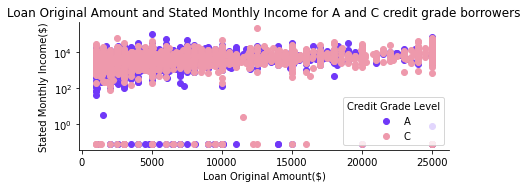

In [178]:
muti_plot(dfcg,'CreditGrade','LoanOriginalAmount','StatedMonthlyIncome','Loan Original Amount($)',
          'Stated Monthly Income($)','Loan Original Amount and Stated Monthly Income for A and C credit grade borrowers',
          'Credit Grade Level','A','C')



### Observation
>In the multivariate chart, it can be found that there is not much difference between Loan Original Amount and Stated Monthly Income under different credit grade levels. Regardless of whether it is a good or poor credit grade level, most borrowers tend to borrow less than 5,000 dollars. Except for some abnormal data, among the similar monthly income amounts, the number of people who borrow more than 10,000 US dollars shows a gradually decreasing trend.

### What is the relationship between Borrower Rate and Loan Original Amount with different borrowers' credit grade ?

In [180]:
loan_data['CreditGrade_new1']= loan_data['CreditGrade']
ordinal_var_dict1 = {'CreditGrade_new1': ['AA', 'A', 'B',
'C']}
for var in ordinal_var_dict1:
    ordered_var2 = pd.api.types.CategoricalDtype(ordered = True,
    categories = ordinal_var_dict1[var])
    loan_data[var] = loan_data[var].astype(ordered_var2)


In [183]:
loan_data['CreditGrade_new2']=loan_data['CreditGrade']
ordinal_var_dict3 = {'CreditGrade_new2': ['D', 'E', 'HR', 'NC']}
for var in ordinal_var_dict3:
    ordered_var3 = pd.api.types.CategoricalDtype(ordered = True,
    categories = ordinal_var_dict3[var])
    loan_data[var] = loan_data[var].astype(ordered_var3)


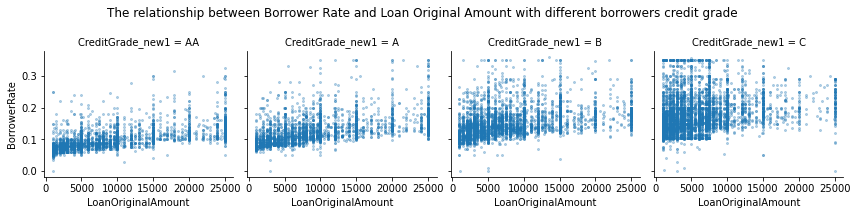

In [200]:
g = sb.FacetGrid(data = loan_data, col = 'CreditGrade_new1', margin_titles = True )#, height=3.5, aspect=.65#)
plt.suptitle('The relationship between Borrower Rate and Loan Original Amount with different borrowers'' credit grade')
g.map(plt.scatter, 'LoanOriginalAmount','BorrowerRate', alpha = 0.3, s= 4)



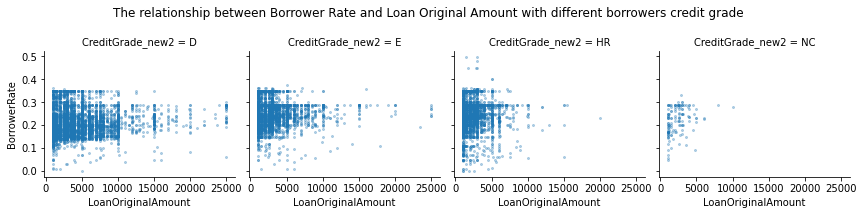

In [201]:
g = sb.FacetGrid(data = loan_data, col = 'CreditGrade_new2', margin_titles = True )#, height=3.5, aspect=.65#)
plt.suptitle('The relationship between Borrower Rate and Loan Original Amount with different borrowers'' credit grade')
g.map(plt.scatter, 'LoanOriginalAmount','BorrowerRate', alpha = 0.3, s= 4)



### Observation
>Borrowers with higher credit grades such as AA or A generally have a low interest rate for their loan. Most of the loan interest rates of AA and A grades are concentrated between 0.04-0.2, which are very low interest rate. When the credit grade is B, the interest rate begins to distribute above 0.2, and the distribution of 0.3 interest rate is more than the former two credit grade. At the C, D, and E levels, interest rate range increses and the distribution becomes less concentrated. Some borrowers' interest rate reach higher than 0.35. 

### What is the relationship between Borrower Rate and Loan Original Amount with different borrowers' Prosper Rating 

In [197]:
pr1 = loan_data.loc[loan_data['ProsperRating (numeric)'].isin([1.0, 2.0,3.0,4.0])]
pr2 = loan_data.loc[loan_data['ProsperRating (numeric)'].isin([5.0, 6.0,7.0])]

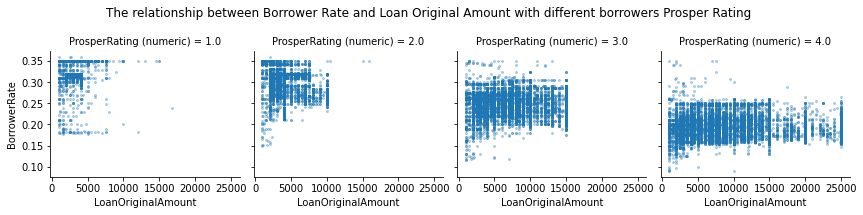

In [202]:
g = sb.FacetGrid(data = pr1, col = 'ProsperRating (numeric)', margin_titles = True)
plt.suptitle('The relationship between Borrower Rate and Loan Original Amount with different borrowers'' Prosper Rating')
g.map(plt.scatter, 'LoanOriginalAmount','BorrowerRate', alpha = 0.3, s= 4)

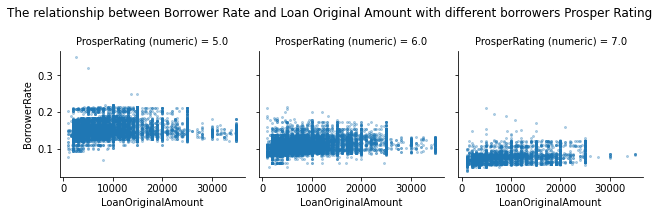

In [203]:
g = sb.FacetGrid(data = pr2, col = 'ProsperRating (numeric)', margin_titles = True)
plt.suptitle('The relationship between Borrower Rate and Loan Original Amount with different borrowers'' Prosper Rating')
g.map(plt.scatter, 'LoanOriginalAmount','BorrowerRate', alpha = 0.3, s= 4)

### Observation
>The trend becomes more apparent when we compare the relationship between the original loan amount and the borrower rate for different borrowers' prosper rating. Borrowers with higher prosper rates have very low interest rates no matter how much they borrow. For example, the interest rate of borrowers with a prosper rate of 7.0 is almost kept below 0.12. The lower the borrower's prosper rate, the higher their interest/borrower rate. For example, for a borrower with a prosper rate of 1.0, the interest rate is at most higher than 0.35, and there is no interest rate provided lower than 0.18. It can also be found that a borrower with a low prosper rate can borrow less loan than a borrower with a high prosper rate.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In the multivariate chart, it can be found that there is not much difference between Loan Original Amount and Stated Monthly Income under different credit grade levels. Regardless of whether it is a good or poor credit grade level, most borrowers tend to borrow less than 5,000 dollars. Except for some abnormal data, among the similar monthly income amounts, the number of people who borrow more than 10,000 US dollars shows a gradually decreasing trend. 
Borrowers with higher credit grades such as AA or A generally have a low interest rate for their loan. Most of the loan interest rates of AA and A grades are concentrated between 0.04-0.2, which are very low interest rate. When the credit grade is B, the interest rate begins to distribute above 0.2, and the distribution of 0.3 interest rate is more than the former two credit grade. At the C, D, and E levels, interest rate range increses and the distribution becomes less concentrated. Some borrowers' interest rate reach higher than 0.35.
The trend becomes more apparent when we compare the relationship between the original loan amount and the borrower rate for different borrowers' prosper rating. Borrowers with higher prosper rates have very low interest rates no matter how much they borrow. For example, the interest rate of borrowers with a prosper rate of 7.0 is almost kept below 0.12. The lower the borrower's prosper rate, the higher their interest/borrower rate. For example, for a borrower with a prosper rate of 1.0, the interest rate is at most higher than 0.35, and there is no interest rate provided lower than 0.18. It can also be found that a borrower with a low prosper rate can borrow less loan than a borrower with a high prosper rate.

### Were there any interesting or surprising interactions between features?

>I thought the loan amount would depend on the amount of the borrower's income. But I didn't find the correlation between them in the graph. And the level of income and the size of the loan amount are not greatly affected by the credit grade.
Compared with credit grade, lenders pay more attention to prosper rate to set the interest rate for borrowers. It is possible that the prosper rate indicates the expected level of risk associated with a loan listing.

## Conclusions
>The Prosper Loan Dataset gives many different perspectives on borrowing. By processing data, visualizing data and analyzing different graphs, we can discover the background of borrowers, and the extend of their credit grade and prosper rate affect the amount of their loan amount and the level of interest rate. In general, credit grade and prosper rate greatly affect the amount of borrowers and the interest rate.